In [1]:
from sources import DataSource, DataFrame
from sinks import DataSink
from processors import DataProcessor


In [2]:
from dataclasses import dataclass
from typing import Iterable, Optional
import time
import threading
# --------------------------------------------------
# Example concrete implementations:
# --------------------------------------------------

# Define a simple data class as our DataFrame.
@dataclass
class MyFrame:
    value: int

# 1. A simple DataSource that generates MyFrame objects.
class SimpleSource(DataSource[MyFrame]):
    def __init__(self, total: int = 5, delay: float = 0.2):
        self.remaining = total
        self.delay = delay
        self.lock = threading.Lock()
        super().__init__()
    
    def fetch(self) -> MyFrame:
        with self.lock:
            if self.remaining <= 0:
                print("[SimpleSource] No more data to fetch.")
                return None
            self.remaining -= 1
            value = self.remaining
        # Simulate delay in fetching data.
        time.sleep(self.delay)
        frame = MyFrame(value)
        print(f"[SimpleSource] Fetched: {frame}")
        return frame
    
    def close(self) -> None:
        print("[SimpleSource] closed.")

# 2. A DataProcessor that doubles the value in MyFrame.
class DoubleProcessor(DataProcessor[MyFrame, MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def process(self, data: MyFrame) -> MyFrame:
        new_frame = MyFrame(data.value * 2)
        print(f"[DoubleProcessor] {data.value} doubled to {new_frame.value}")
        return new_frame

# 3. A DataProcessor that increments the value in MyFrame.
class IncrementProcessor(DataProcessor[MyFrame, MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def process(self, data: MyFrame) -> MyFrame:
        new_frame = MyFrame(data.value + 1)
        print(f"[IncrementProcessor] {data.value} incremented to {new_frame.value}")
        return new_frame

# 4. A DataSink that prints the final MyFrame.
class PrintSink(DataSink[MyFrame]):
    def __init__(self, sources: Iterable[DataSource[MyFrame]]):
        super().__init__(sources)
    
    def write(self, data: MyFrame) -> None:
        print(f"[PrintSink] Final output: {data}")

    def close(self) -> None:
        print("[PrintSink] closed.")
        super().close()


# --------------------------------------------------
# Example Pipeline Chaining:
# SimpleSource --> DoubleProcessor --> IncrementProcessor --> PrintSink
# --------------------------------------------------
# Instantiate a source that produces 5 MyFrame items.
source = SimpleSource(total=5, delay=0.1)

# First processor doubles the value.
double_proc = DoubleProcessor(sources=[source])

# Second processor increments the value.
# increment_proc = IncrementProcessor(sources=[double_proc])

# Sink prints the processed data.
sink = PrintSink(sources=[double_proc])

# Consume data from the sink.
print("\n--- Processing Pipeline Output ---")
try:
    for item in sink:
       # The sink's process() already calls sink() internally,
        # so here we can just iterate to ensure the pipeline runs.
        pass
except KeyboardInterrupt:
    pass
finally:
    sink.__close__()

DataSource: Detected DataFrame class: <class '__main__.MyFrame'>
DataProcessor: Detected DataFrame class: <class '__main__.MyFrame'>
DataProcessor: Detected DataFrame class: None

--- Processing Pipeline Output ---
[PrintSink] closed.
[SimpleSource] closed.


In [5]:
# source = SimpleSource(total=5, delay=0.1)
source.dataframe_type

__main__.MyFrame

In [6]:
# double_proc = DoubleProcessor(sources=[source])
double_proc.dataframe_type

__main__.MyFrame

In [7]:
sink = PrintSink(sources=[increment_proc])
sink.dataframe_type

[PrintSink] Final output: MyFrame(value=9)


In [8]:
sink.dataframe_type

In [1]:
import os
def gather_video_paths_iter(input_dir, output_dir):
    for root, _, files in os.walk(input_dir):
        for file in sorted(files):
            if file.endswith(".mp4"):
                rel_path = os.path.relpath(root, input_dir)
                video_input = os.path.join(root, file)
                video_output_dir = os.path.join(output_dir, rel_path)
                video_output = os.path.join(video_output_dir, file)
                if not os.path.isfile(video_output):
                    yield video_input, video_output

def gather_video_paths(input_dir, output_dir):
    video_paths = []
    for paths in gather_video_paths_iter(input_dir, output_dir):
        video_paths.append(paths)
    return video_paths

In [2]:
files = gather_video_paths('/home/mrwhite0racle/persist/data/vox2/test/', '/home/mrwhite0racle/persist/data/vox2/test_output/')

In [3]:
files

[('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00026.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00026.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00027.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00027.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00028.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00028.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/GpongLybzsk/00029.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/GpongLybzsk/00029.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/o7ZSwarweoo/00031.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/o7ZSwarweoo/00031.mp4'),
 ('/home/mrwhite0racle/persist/data/vox2/test/id02725/KC87XotWL68/00030.mp4',
  '/home/mrwhite0racle/persist/data/vox2/test_output/id02725/KC87XotWL68/00030.mp4'),
 ('/home/mrwhite

In [1]:
from matplotlib import pyplot as plt
from pipelines.voxceleb import read_video
from pipelines.face_align import FaceAlignmentProcessor

2025-04-05 05:20:40.365600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743830440.389676 2049778 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743830440.397157 2049778 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743830440.416575 2049778 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743830440.416602 2049778 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743830440.416604 2049778 computation_placer.cc:177] computation placer alr

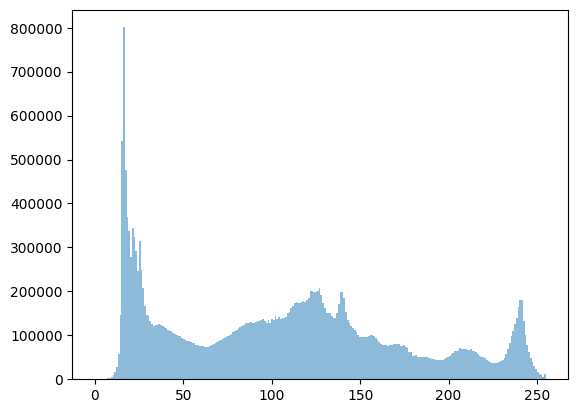

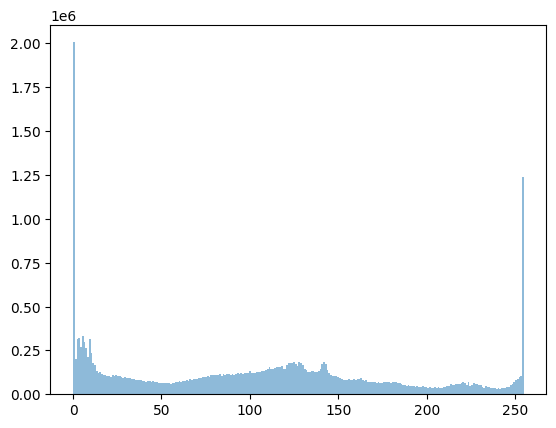

In [4]:
import numpy as np
# sample_path = '/home/mrwhite0racle/persist/data/vox2/test_output_resampled/id00017/7t6lfzvVaTM/00009.mp4'
sample_path = '/home/mrwhite0racle/persist/data/vox2/test/id07961/Qqkmag1M-wo/00201.mp4'
frames = read_video(sample_path, change_fps=False, reader='rsreader_fast')
framesd = read_video(sample_path, change_fps=False, reader='decord')

# Plot histograms of both
plt.hist(np.array(frames).flatten(), bins=256, range=(0, 255), alpha=0.5, label='frames')
plt.show()
plt.hist(np.array(framesd).flatten(), bins=256, range=(0, 255), alpha=0.5, label='framesd')
plt.show()

In [3]:
aligner = FaceAlignmentProcessor(resolution=256)

Aligned 185 frames from 185 frames


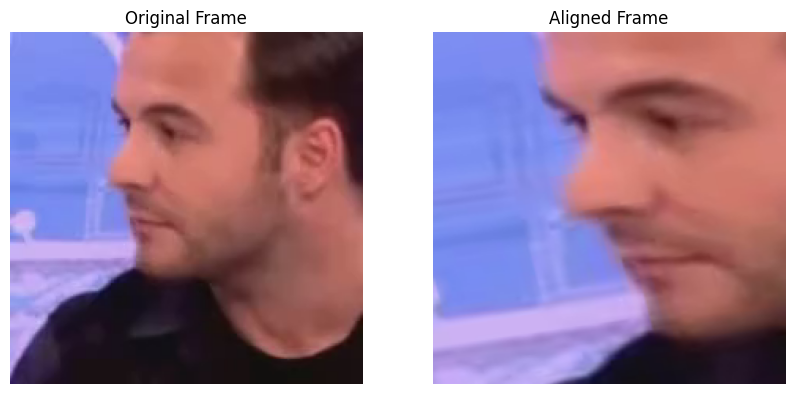

In [7]:
aligned = aligner.process_frames(frames, break_on_error=True)
print(f"Aligned {len(aligned)} frames from {len(frames)} frames")

# Display the original and aligned frames
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(frames[0])
plt.title("Original Frame")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(aligned[0])
plt.title("Aligned Frame")
plt.axis("off")
plt.show()

# super_aligned = aligner.process_frames(aligned, break_on_error=True)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(aligned[0])
# plt.title("Aligned Frame")
# plt.axis("off")
# plt.subplot(1, 2, 2)
# plt.imshow(super_aligned[0])
# plt.title("Super Aligned Frame")
# plt.axis("off")
# plt.show()

In [1]:
from pipelines.voxceleb import run_pipeline

2025-04-05 05:09:59.285498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743829799.309918 1995619 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743829799.317586 1995619 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743829799.337086 1995619 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743829799.337111 1995619 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743829799.337113 1995619 computation_placer.cc:177] computation placer alr

Total video paths: 34327, Rank 0 has 34327


Writing videos:   0%|          | 0/34327 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743829802.669517 1995797 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829802.691372 1995813 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829802.866655 1995813 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


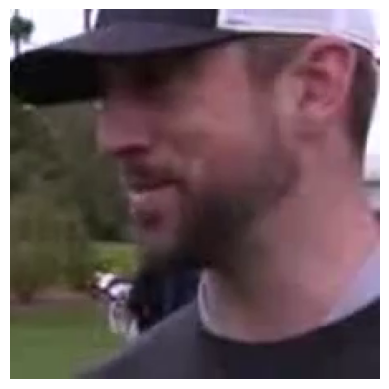

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00092.mp4, sucess_rate = 0.00


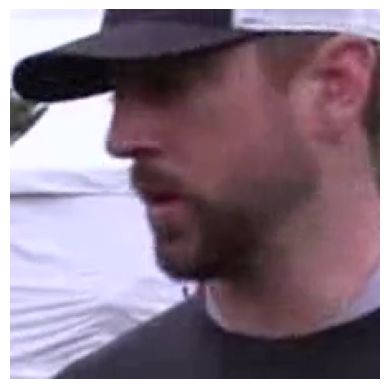

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00093.mp4, sucess_rate = 0.00


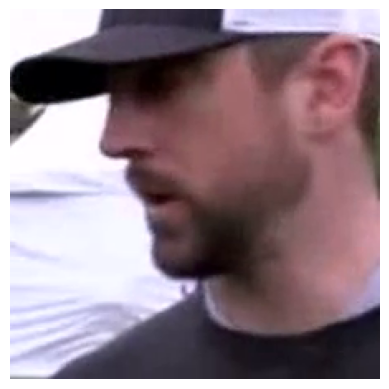

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/ddLPBVSzuPs/00103.mp4, sucess_rate = 0.00


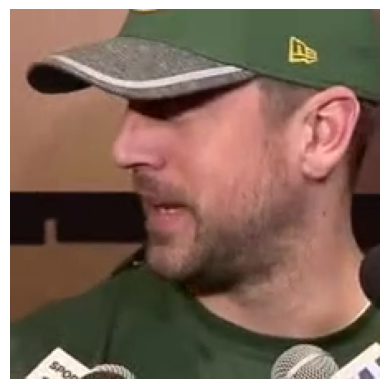

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00159.mp4, sucess_rate = 0.00


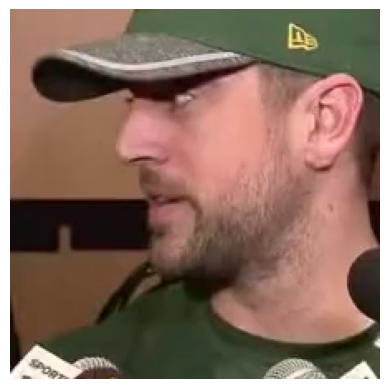

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00160.mp4, sucess_rate = 0.00


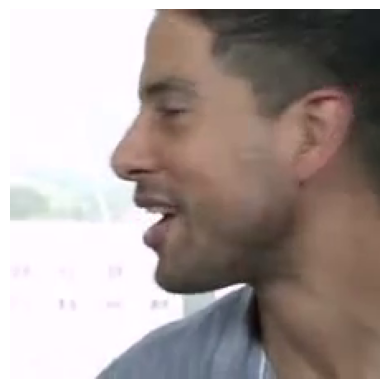

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00009.mp4, sucess_rate = 0.00


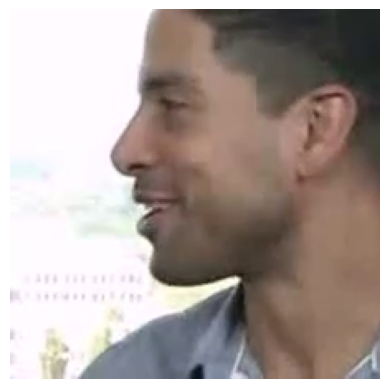

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00010.mp4, sucess_rate = 0.00


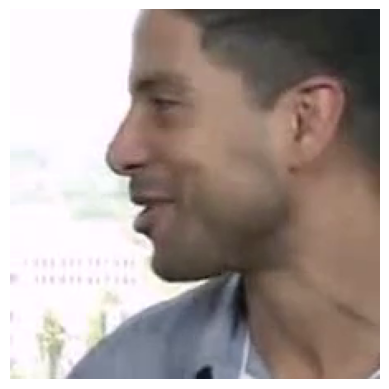

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00011.mp4, sucess_rate = 0.00


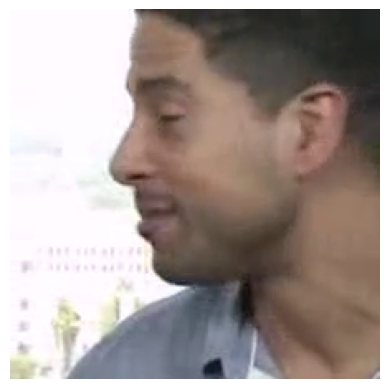

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00013.mp4, sucess_rate = 0.00


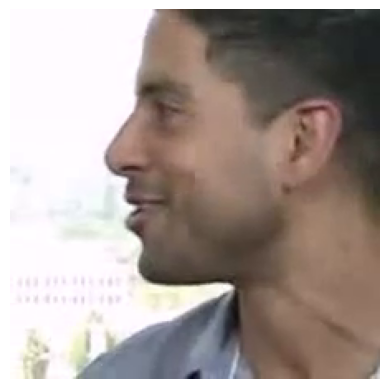

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00015.mp4, sucess_rate = 0.00


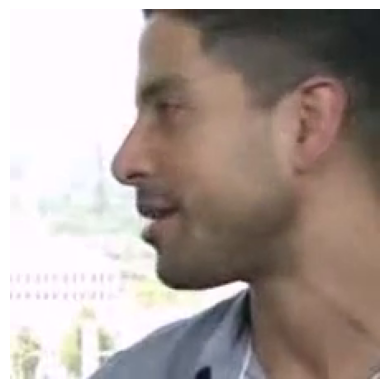

Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00018.mp4, sucess_rate = 0.00


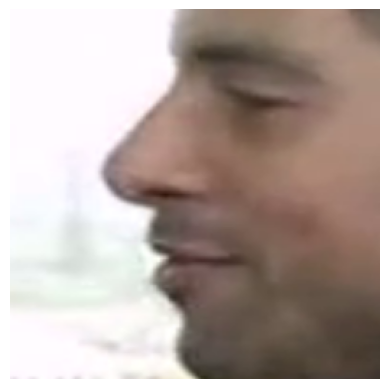

Error in face detection for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00019.mp4, sucess_rate = 0.00


Writing videos:   0%|          | 3/34327 [00:22<55:53:31,  5.86s/it] 

In [ ]:
run_pipeline(
    input_dir='/home/mrwhite0racle/persist/data/vox2/test/',
    output_dir='/home/mrwhite0racle/persist/data/vox2/test_output/',
    process_temp_dir='/home/mrwhite0racle/persist/data/vox2/temp/',
    num_processes=1,
    num_workers_per_process=1,
    # use_wandb=True,
)

In [ ]:
run_pipeline(
    input_dir='/home/mrwhite0racle/persist/data/vox2/test/',
    output_dir='/home/mrwhite0racle/persist/data/vox2/test_output/',
    process_temp_dir='/home/mrwhite0racle/persist/data/vox2/temp/',
    num_processes=1,
    num_workers_per_process=1,
    # use_wandb=True,
)

Total video paths: 34333, Rank 0 has 34333


Writing videos:   0%|          | 0/34333 [00:00<?, ?it/s]INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1743829703.254324 1894880 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829703.275683 1894899 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1743829703.453667 1894899 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00092.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/X9M79aB1RS4/00093.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/ddLPBVSzuPs/00103.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00159.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00017/lZf1RB6l5Gs/00160.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00009.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00010.mp4, sucess_rate = 0.00
Error in affine transformation for /home/mrwhite0racle/persist/data/vox2/test/id00061/46tdg4vE31g/00011.

Writing videos:   0%|          | 6/34333 [00:34<43:55:42,  4.61s/it] 